In [14]:
import numpy as np
import pandas as pd
import numpy.random as random
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [15]:
def mul_ten_and_mat(tensor, matrix):
    ten_shape = tensor.shape
    result = np.zeros((ten_shape[0], ten_shape[2]))
    for i in range(ten_shape[2]):
        result[:,i] = tensor[:,:,i].dot(matrix[:,i])
    return result

N = 2000
A = np.array([
    [
        [0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.5]
    ],
    [
        [0, 0, 0],
        [0.4, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0.5, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    ])

T = np.array([
        [1, -1, 1],
        [-1, 1, 1],
        [1, 1, -1]
    ])

tmp = np.array(
    [
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3)) + T * i**2 / 500000
data_tensor.shape

(2000, 3, 3)

In [16]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.969847,-0.557478,0.773470,1.075439,-0.813949,0.173232,-0.009624,-0.194278,0.476712
2,-0.292416,-0.772558,0.297511,-0.706021,-0.276460,0.331214,0.345908,0.294244,-0.350889
3,-0.015859,-0.612576,0.894810,0.152768,-0.858028,-1.116022,-0.658394,-0.001361,0.872239
4,0.488870,-0.042765,0.973395,0.472074,-0.360042,-0.082752,0.856598,-0.879510,0.455359
...,...,...,...,...,...,...,...,...,...
1995,15.435267,-12.509400,8.312082,-3.841305,8.295329,6.032100,3.440381,6.981897,-7.795731
1996,15.847569,-12.910540,7.903454,-4.782139,6.974089,6.137096,4.689907,8.621132,-8.249918
1997,16.431367,-12.224459,7.084579,-3.606179,7.868779,5.188021,3.016596,8.719709,-8.789664
1998,15.284617,-13.453360,7.339786,-3.976524,7.717211,6.127516,4.562244,8.374916,-7.457246


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

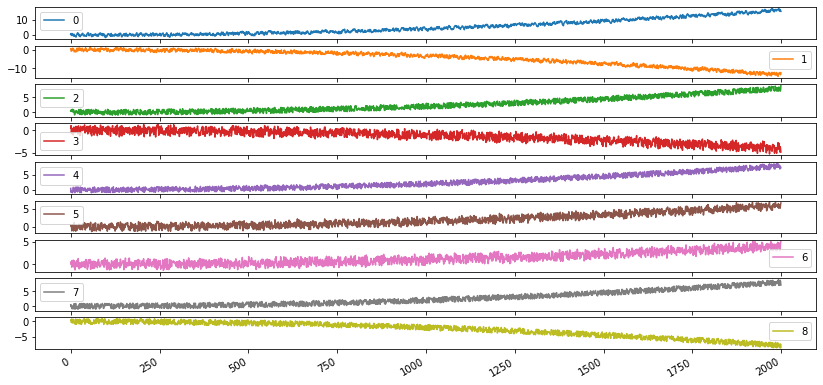

In [17]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [18]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [19]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [20]:
train_tensor_rotated = np.empty((N_train, 3, 3))
for i in range(N_train):
    train_tensor_rotated[i] = np.rot90(train_tensor[i])
train_tensor_rotated

array([[[ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01],
        [ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01],
        [ 5.00000000e-01,  5.00000000e-01,  5.00000000e-01]],

       [[-9.62353495e-03, -1.94278433e-01,  4.76711682e-01],
        [ 1.07543902e+00, -8.13948917e-01,  1.73231620e-01],
        [ 9.69847207e-01, -5.57478165e-01,  7.73469862e-01]],

       [[ 3.45907929e-01,  2.94243735e-01, -3.50888782e-01],
        [-7.06020573e-01, -2.76460372e-01,  3.31213549e-01],
        [-2.92415893e-01, -7.72557716e-01,  2.97511296e-01]],

       ...,

       [[ 3.88996144e+00,  6.85065105e+00, -6.84637706e+00],
        [-3.82720699e+00,  6.60445646e+00,  4.09618385e+00],
        [ 1.35206124e+01, -1.16206379e+01,  7.24575469e+00]],

       [[ 3.28687237e+00,  7.16152900e+00, -7.13422925e+00],
        [-2.27345192e+00,  7.23343900e+00,  4.36472635e+00],
        [ 1.22642437e+01, -1.18963462e+01,  5.90999648e+00]],

       [[ 2.38371114e+00,  7.32461169e+00, -6.64188216e+00],
 

In [21]:
test_tensor_rotated = np.empty((N_test, 3, 3))
for i in range(N_test):
    test_tensor_rotated[i] = np.rot90(test_tensor[i])
test_tensor_rotated

array([[[  2.663901  ,   6.25759746,  -6.35291021],
        [ -3.47550511,   5.7699389 ,   5.06885495],
        [ 11.85058215, -10.97576484,   6.50750901]],

       [[  3.15039452,   7.20211113,  -7.16327137],
        [ -4.06450512,   6.89161067,   4.8936176 ],
        [ 12.86248741, -11.01528007,   6.91799534]],

       [[  3.17907749,   5.82210693,  -6.99621471],
        [ -3.2852304 ,   6.75201309,   3.99096919],
        [ 13.38689561, -10.51207882,   6.78058918]],

       ...,

       [[  3.01659551,   8.71970949,  -8.7896642 ],
        [ -3.6061789 ,   7.86877861,   5.18802057],
        [ 16.4313671 , -12.22445903,   7.0845791 ]],

       [[  4.56224373,   8.37491558,  -7.45724633],
        [ -3.97652379,   7.71721107,   6.12751552],
        [ 15.28461657, -13.45336039,   7.33978613]],

       [[  5.18297957,   7.10207694,  -8.58177314],
        [ -4.79670251,   7.39067631,   6.64433252],
        [ 15.27894291, -12.47320842,   8.87279384]]])

In [22]:
train_model_sets_col = jts.split_cols_into_model_sets(train_tensor, N_train)
train_model_sets_row = jts.split_cols_into_model_sets(train_tensor_rotated, N_train)
test_model_sets_col = jts.split_cols_into_model_sets(test_tensor, N_test)
test_model_sets_row = jts.split_cols_into_model_sets(test_tensor_rotated, N_test)

In [23]:
result_model_sets_col = np.empty((3, N_test, 3))

for i in range(3):
    train_df = pd.DataFrame(train_model_sets_col[i])
    test_df = pd.DataFrame(test_model_sets_col[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df.diff().dropna()
    model = VAR(train_diff)
    fit = model.fit(3)

    test_df.columns = test_df.columns[:].astype(str)
    results_diff = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets_col[i] = jts.invert_diff_transformation(results_diff, train_df)
result_tensor_col = jts.collect_result_cols_into_tensor(result_model_sets_col, N_test)

In [24]:
result_model_sets_row_rotated = np.empty((3, N_test, 3))

for i in range(3):
    train_df = pd.DataFrame(train_model_sets_row[i])
    test_df = pd.DataFrame(test_model_sets_row[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df.diff().dropna()
    model = VAR(train_diff)
    fit = model.fit(3)

    test_df.columns = test_df.columns[:].astype(str)
    results_diff = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets_row_rotated[i] = jts.invert_diff_transformation(results_diff, train_df)

In [25]:
result_tensor_row_rotated = jts.collect_result_cols_into_tensor(result_model_sets_row_rotated, N_test)
result_tensor_row = np.empty((N_test, 3, 3))
for i in range(N_test):
    result_tensor_row[i] = np.rot90(result_tensor_row_rotated[i], 3)

In [26]:
result_tensor_col.shape

(200, 3, 3)

In [27]:
result_tensor_row.shape

(200, 3, 3)

In [29]:
result_tensor = np.empty((N_test, 3, 3))
for i in range(N_test):
    for j in range(3):
        for k in range(3):
            result_tensor[i][j][k] = np.mean([result_tensor_col[i][j][k], result_tensor_row[i][j][k]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

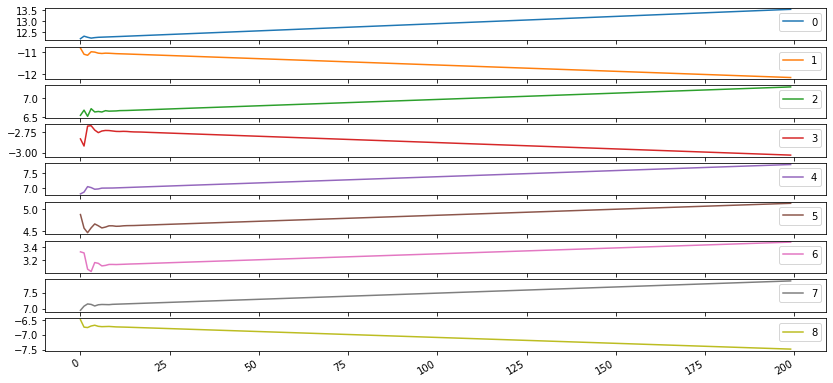

In [33]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

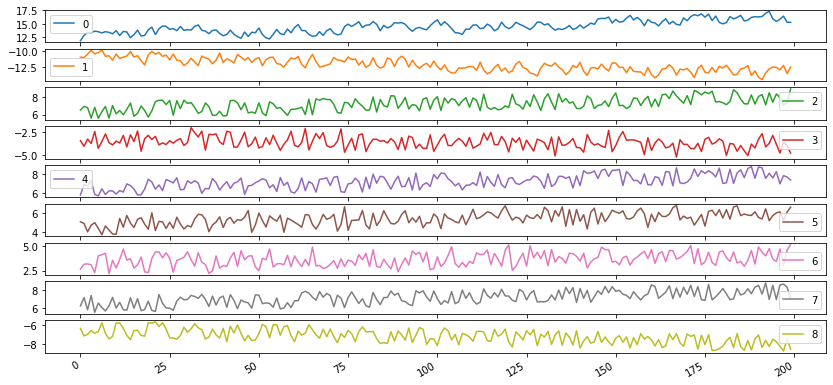

In [34]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [31]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error

,MAPE
0,0.0750596
1,0.0611786
2,0.0923734
3,0.0992954
4,0.118409
...,...
195,0.102832
196,0.135119
197,0.124757
198,0.105108


<AxesSubplot:>

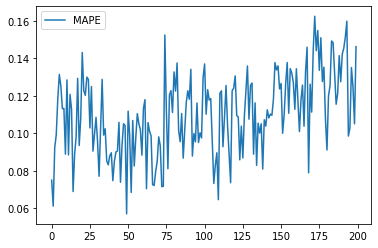

In [32]:
error.plot()

In [35]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       -1.601         3.293          1.612          10.770%       
1       0.517          0.799          0.727          5.809%        
2       -0.213         0.463          0.567          7.778%        
3       0.762          0.974          0.834          21.303%       
4       0.146          0.415          0.544          7.795%        
5       -0.531         0.685          0.688          12.193%       
6       -0.343         0.557          0.610          16.060%       
7       0.288          0.492          0.586          8.624%        
8       0.104          0.402          0.532          7.386%        
